# Create a network with two population units

Here two spheres are placed with radie 200 micrometer using the density function ```(d < 200e-6)*1```. You can also use decaying densities ```exp(-d/200e-6)``` or any other function of ```d``` distance to the centre. The equation strings are evaluated using numexpr.

You specify what ```neuron_types``` are included in the population unit.

In [1]:
import os
import numpy as np
from snudda import SnuddaInit

network_path = os.path.join("networks","population_unit_network")
config_file = os.path.join(network_path, "network-config.json")
si = SnuddaInit(config_file=config_file, random_seed=12345)
si.define_striatum(num_dSPN=1000, num_iSPN=1000, num_FS=0, num_LTS=0, num_ChIN=0,
                   volume_type="cube", neurons_dir="$DATA/neurons")

# The centre of the cube is [0.00475, 0.004, 0.00775]. num_neurons is optional
si.add_population_unit_density(structure_name="Striatum", neuron_types=["dSPN", "iSPN"], 
                               unit_centre=np.array([0.00475, 0.004, 0.00775]) -np.array([0,50e-6,150e-6]),
                               probability_function="(d < 200e-6)*1", num_neurons=100)
si.add_population_unit_density(structure_name="Striatum", neuron_types=["dSPN", "iSPN"], 
                               unit_centre=np.array([0.00475, 0.004, 0.00775]) -np.array([150e-6,0,0]),
                               probability_function="(d < 200e-6) * 1", num_neurons=100)
 
si.write_json(config_file)

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum
Adding neurons: dSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/ispn
No directory $DATA/neurons/striatum/ngf, skipping NGF cells.
Writing networks/population_unit_network/network-config.json


## Start ipyparallel

In [2]:
os.environ["IPYTHONDIR"] = os.path.join(os.path.abspath(os.getcwd()), ".ipython")
os.environ["IPYTHON_PROFILE"] = "default"
os.system("ipcluster start -n 4 --profile=$IPYTHON_PROFILE --ip=127.0.0.1 --log-level ERROR 2> parallel-log.txt &")

import time
time.sleep(10) # Wait for ipcluster to start

## Create network

In [3]:
from snudda import Snudda
snd = Snudda(network_path=network_path, parallel=True, ipython_profile="default")
snd.create_network()

Placing neurons
Network path: networks/population_unit_network
Creating missing directory networks/population_unit_network/log
Created directory networks/population_unit_network/log
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/.ipython/profile_default/security/ipcontroller-client.json

Reading SNUDDA_DATA=None from networks/population_unit_network/network-config.json
Generating 8048 points for networks/population_unit_network/mesh/Striatum-cube-mesh-0.00029179512939439816.obj
n_points = 7664, previous close_pairs = 13144
n_points = 7301, previous close_pairs = 10693
n_points = 6957, previous close_pairs = 8833
n_points = 6633, previous close_pairs = 7292
n_points = 6330, previous close_pairs = 6110
n_points = 6048, previous close_pairs = 5088
n_points = 5785, previous close_pairs = 4292
n_points = 5543, previous close_pairs = 3556
n_points = 5321, previous close_pairs = 2974
n_points = 5121, previous close_pairs = 2543
n_points = 4941, previous cl

In [5]:
os.system("ipcluster stop")

2024-02-01 13:45:10.798 [IPClusterStop] Stopping cluster 
2024-02-01 13:45:10.798 [IPClusterStop] Stopping controller
2024-02-01 13:45:10.952 [IPClusterStop] Stopping engine(s): 1706791338


0

## Plot network
In the figure below you can see the two population units (cyan and brown), as well as the neurons not belonging to a population unit (grey).

Reading SNUDDA_DATA=None from networks/population_unit_network/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/Snudda/snudda/utils/../data from networks/population_unit_network/network-synapses.hdf5
Population unit 0 has 1800 neurons
Population unit 1 has 100 neurons
Population unit 2 has 100 neurons


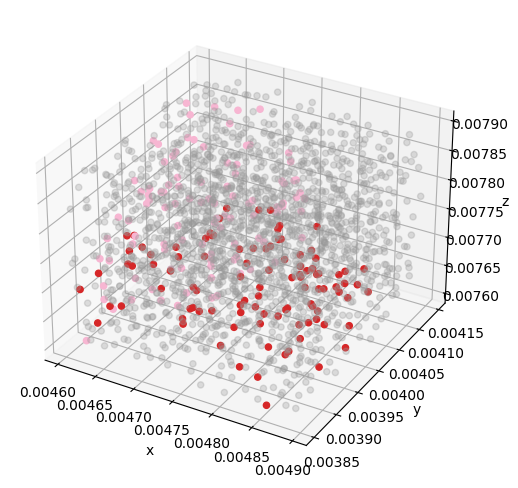

In [4]:
from snudda.plotting import PlotNetwork

pn = PlotNetwork(network_path)
pn.plot_populations()

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)